# Template 

- Author: Israel Oliveira [\[e-mail\]](mailto:'Israel%20Oliveira%20'<prof.israel@gmail.com>)

In [1]:
%load_ext watermark

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.fftpack import fft
from scipy.signal import find_peaks
from itertools import cycle

In [3]:
# Run this cell before close.
%watermark
%watermark --iversion
%watermark -b -r -g

2020-06-16T14:35:36+00:00

CPython 3.7.7
IPython 7.15.0

compiler   : GCC 8.3.0
system     : Linux
release    : 4.19.76-linuxkit
machine    : x86_64
processor  : 
CPU cores  : 16
interpreter: 64bit
numpy  1.18.5
scipy  1.4.1
pandas 1.0.4

Git hash: 9d9723b9e9d950a8800c40f1ea7b1355c9d0bee1
Git repo: https://github.com/ysraell/examples.git
Git branch: master


In [114]:
N = 100
days_freq = [15, 100]
bases = []
for freq in days_freq:
    bases.append(list(np.repeat(0, freq-1))+[1])

In [115]:
signals = []
for base in bases:
    tmp = []
    for n in cycle(base):
        tmp.append(n)
        if len(tmp) >= N:
            break
    signals.append(tmp)

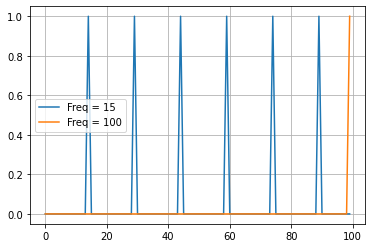

In [116]:
pd.DataFrame(data=[x for x in zip(*signals)], columns=["Freq = {}".format(x) for x in days_freq]).plot(grid=True)

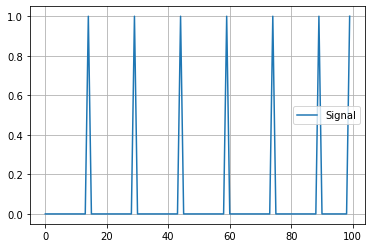

In [117]:
signal = [min(sum(x),1) for x in zip(*signals)]
pd.DataFrame(data=signal, columns=["Signal"]).plot(grid=True)

In [118]:
signal_fft = 2.0/N * np.abs(fft(signal)[:N//2])

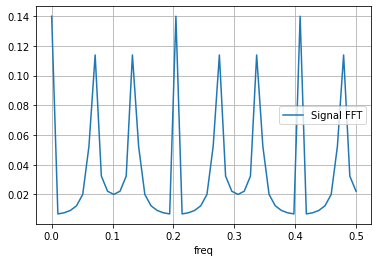

In [120]:
xf = np.linspace(0.0, 1.0/(2.0), N//2)
pd.DataFrame(data=[x for x in zip(xf, signal_fft)], columns=["freq","Signal FFT"]).set_index('freq').plot(grid=True)

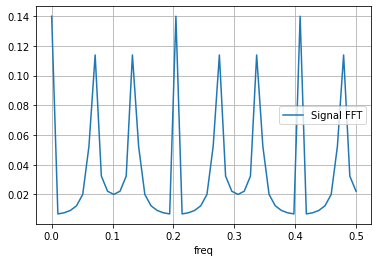

In [121]:
xf = np.linspace(0.0, 1.0/(2.0), N//2)
pd.DataFrame(data=[x for x in zip(xf, signal_fft)], columns=["freq","Signal FFT"]).set_index('freq').plot(grid=True)

In [122]:
peaks, _ = find_peaks(signal_fft, height=0.12)

In [123]:
xf[peaks]

array([0.20408163, 0.40816327])

In [124]:
xf[-1]

0.5

In [125]:
2/xf[peaks]

array([9.8, 4.9])